# Fashion MNIST 
- Classify fashioning clothable items
- Uses CNN (Convolutional Neural Network)
- Data collection
- Data preprocessing
- Modle building
- Testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

## Data collection

In [2]:
# Dictionaries to interconvert class of items and its label
labelToClass={
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

In [3]:
train=pd.read_csv('fashion-mnist_train.csv')
test=pd.read_csv('fashion-mnist_test.csv')

## Data preprocessing

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train.shape,test.shape)

(60000, 785) (10000, 785)


In [6]:
xtrain=train.iloc[:,1:]
ytrain=train['label']
xtest=test.iloc[:,1:]
ytest=test['label']

In [7]:
print(xtrain.shape,ytrain.shape)

(60000, 784) (60000,)


In [8]:
print(xtest.shape,ytest.shape)

(10000, 784) (10000,)


In [9]:
xtrain=np.array(xtrain)
xtest=np.array(xtest)
xtrain=xtrain.reshape(-1,28,28,1)
xtest=xtest.reshape(-1,28,28,1)

In [10]:
xtrain.shape,xtest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [12]:
ytrain.shape,ytest.shape

((60000, 10), (10000, 10))

## Build Convonutional Neural Network (CNN Model)

In [13]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1))) # Input layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(units=10,activation='softmax')) # Output layer

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 32)          36896     
_________________________________________________________________
flatten (Flatten)            (None, 32)                0

In [15]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
# Checkpoint - to get the best model
checkpnt=ModelCheckpoint('./best_model.h5',monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto') # Whenever val_accuaracy is increased then current model is saved
# Earlystopping - to avoid unnecessary epochs
earlystop=EarlyStopping(monitor='val_accuracy',min_delta=0.005,patience=5,verbose=1,mode='auto',restore_best_weights=True) # If val_accuarcy is not improved by 0.005 for 5 epochs then it will early stop

In [17]:
# Train the model
hist=model.fit(xtrain,ytrain,epochs=20,batch_size=32,shuffle=True,validation_split=0.1,callbacks=[checkpnt,earlystop])

Epoch 1/20
1687/1688 [============================>.] - ETA: 0s - loss: 0.5193 - accuracy: 0.8236
Epoch 00001: val_accuracy improved from -inf to 0.86150, saving model to ./best_model.h5
1688/1688 [==============================] - 64s 38ms/step - loss: 0.5194 - accuracy: 0.8236 - val_loss: 0.3857 - val_accuracy: 0.8615
Epoch 2/20
1687/1688 [============================>.] - ETA: 0s - loss: 0.3304 - accuracy: 0.8808
Epoch 00002: val_accuracy improved from 0.86150 to 0.88133, saving model to ./best_model.h5
1688/1688 [==============================] - 64s 38ms/step - loss: 0.3304 - accuracy: 0.8808 - val_loss: 0.3261 - val_accuracy: 0.8813
Epoch 3/20
1687/1688 [============================>.] - ETA: 0s - loss: 0.2885 - accuracy: 0.8938
Epoch 00003: val_accuracy improved from 0.88133 to 0.88900, saving model to ./best_model.h5
1688/1688 [==============================] - 63s 37ms/step - loss: 0.2886 - accuracy: 0.8938 - val_loss: 0.3105 - val_accuracy: 0.8890
Epoch 4/20
1688/1688 [======

In [18]:
bestModel=load_model('best_model.h5') # Load the best model

## Check accuracy of model on testing data

In [19]:
bestModel.evaluate(xtest,ytest)

313/313 [==============================] - 3s 10ms/step - loss: 0.3027 - accuracy: 0.9027


[0.3027240037918091, 0.9027000069618225]

In [20]:
y_pred=bestModel.predict(xtest)

In [21]:
y_pred=np.argmax(y_pred,axis=1)
y_true=np.argmax(ytest,axis=1)

In [22]:
acc=((y_pred==y_true).sum()/y_pred.shape[0])*100
print(acc)

90.27


So we are getting good<b> testing accuracy of 90.27</b>

In [23]:
def displayImg(img):
    plt.imshow(img.reshape(28,28))
    plt.show()

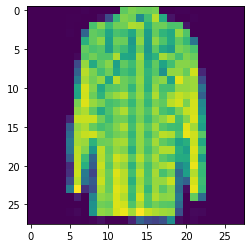

Shirt Shirt


In [24]:
displayImg(xtest[256])
print(labelToClass[y_pred[256]],labelToClass[y_true[256]])

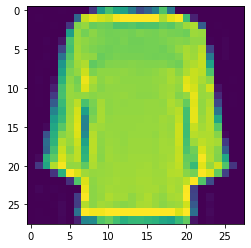

Shirt Shirt


In [25]:
displayImg(xtest[1025])
print(labelToClass[y_pred[1025]],labelToClass[y_true[1025]])

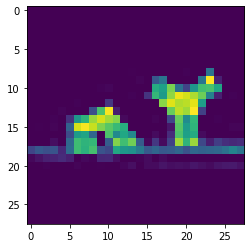

Sandal Sandal


In [26]:
displayImg(xtest[999])
print(labelToClass[y_pred[999]],labelToClass[y_true[999]])

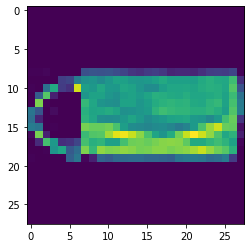

Bag Bag


In [27]:
displayImg(xtest[7856])
print(labelToClass[y_pred[7856]],labelToClass[y_true[7856]])

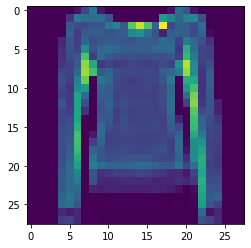

Pullover Pullover


In [28]:
displayImg(xtest[2])
print(labelToClass[y_pred[2]],labelToClass[y_true[2]])

## Conclusion

For this kind of MNIST dataset we are getting <b>testing accuracy of 90.27</b> using CNN model.It contains a lot of datapoints so CNN works better here.